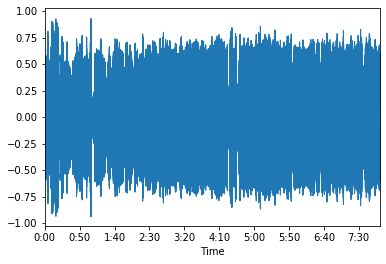

In [43]:
url=r"D:\mastered\B.wav"
audio_path = url
x, sr = librosa.load(url)
librosa.display.waveplot(x, sr=sr)


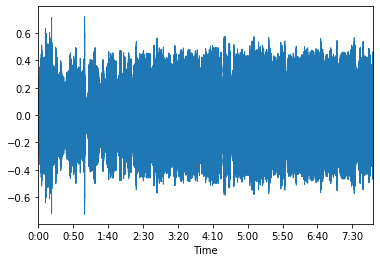

In [44]:
url=r"D:\unmastered\B.wav"
audio_path = url
x, sr = librosa.load(url)
librosa.display.waveplot(x, sr=sr)


In [11]:
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20)
mfccs.shape

(20, 223)

In [45]:
import numpy as np
mfccsscaled = np.mean(mfccs.T,axis=0)
len(list(mfccsscaled))

20

In [55]:
import librosa,librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
import glob 
import sklearn
import os
import csv
import IPython.display as ipd
#ipd.Audio('/Users/niranjandr/Music/Music/224031__akshaylaya__bheem-b-002.wav')

In [57]:
#creating a csv file with file description and respective classes

path = r'C:\Users\rames\OneDrive\Desktop\namma\MusicLiveAudioMixing\sounds'

with open('metadata.csv', 'w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['folder', 'file', 'class'])
    for root, dirs, files in os.walk(path):
        #print(root,"abc",dirs,"abc",root.split(path))
        for filename in files:
            #print(root,dirs,files)
            a=0
            if(root.split(path)[1][1:]=='mridanga'):
                a=1
            elif(root.split(path)[1][1:]=='violin'):
                a=2
            elif(root.split(path)[1][1:]=='vocals'):
                a=3
            writer.writerow([root.split(path)[1][1:], os.path.join(root,filename),a])

In [35]:
#reading from csv file, extracting MFCCs and creating a new dataframe


In [58]:
#trying for first 5 
df=pd.read_csv("metadata.csv")

In [59]:
mfccs_all=[]
for i in range(len(df)) : 
    #print(df.iloc[i, 1]) 
    #ipd.Audio(df.iloc[i,1])
    x, sr = librosa.load(df.iloc[i,1])
    #Plot the signal:
    #plt.figure(figsize=(14, 5))
    #librosa.display.waveplot(x, sr=sr)
    #extracting 20 mfccs
    mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20)
    #scaling to 1D
    mfccsscaled = list(np.mean(mfccs.T,axis=0))
    mfccs_all.append(mfccsscaled)
    

In [60]:
df_features = pd.DataFrame(mfccs_all) 

In [61]:
#concatenating the 2 datasets
result = pd.concat([df, df_features], axis=1, sort=False)

In [62]:
result

,folder,file,class,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-451.491943,141.533630,28.015324,18.869188,12.641405,8.525525,-7.222494,...,-1.836923,-2.713927,-0.618876,-4.765179,-2.424993,0.418764,1.837256,5.615144,5.693042,6.736572
1,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-473.140900,126.132660,20.262114,12.381504,11.520379,6.494797,-5.717353,...,-3.741132,-4.940279,-3.613872,-5.515125,-4.245512,-1.010238,1.151117,6.438902,5.499387,6.390815
2,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-515.033203,119.515503,-3.490358,7.060856,12.061170,14.356379,-6.172790,...,-3.954137,-4.964575,-10.512115,-5.327112,-6.294145,3.541006,1.559894,9.093796,3.040333,6.368342
3,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-499.320648,115.780571,17.857210,9.555959,13.433734,14.391262,5.651865,...,-1.124015,-3.465693,-7.477590,-6.303216,-4.775249,1.274344,0.625194,4.707363,2.198680,3.268360
4,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-509.789612,121.594109,1.334038,5.771701,10.732199,12.734104,-2.949780,...,-3.179417,-5.477241,-11.644210,-6.447506,-6.834515,0.013975,-2.824029,7.615919,1.123386,3.752386
5,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-503.418427,123.663742,-0.083170,3.923403,11.414993,11.816143,-4.208979,...,-3.987872,-4.822972,-10.763214,-5.922228,-6.110814,-2.052097,-4.130204,6.474923,1.552261,5.244177
6,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-473.899536,124.691818,-5.784612,2.398271,8.959587,8.216973,-7.079369,...,-2.819972,-4.588440,-10.400862,-6.562430,-6.848197,0.072959,-3.577537,6.514229,2.101872,5.075189
7,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-442.010651,122.512268,9.085167,8.244941,9.031857,8.729366,0.185785,...,-1.462684,-5.033297,-9.105168,-6.490179,-4.781073,-0.237858,0.279100,3.902014,2.323977,2.888819
8,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-435.271545,144.935638,23.717865,12.850806,13.702109,12.970267,-4.193036,...,-4.915386,-6.864146,-5.048831,-6.241067,-5.640430,-1.975069,-0.338091,3.065142,0.360331,2.548587
9,mridanga,C:\Users\rames\OneDrive\Desktop\namma\MusicLiv...,1,-504.660278,124.186806,32.228481,16.153414,13.222445,10.472991,-0.695105,...,-2.733168,-5.272815,-4.725972,-4.056186,-2.904887,0.714391,1.629720,4.644040,3.244779,3.850113


In [63]:
result.to_csv('features_phase1.csv') 

In [14]:
import sklearn as sk
from sklearn import svm
import pandas as pd

In [16]:
result = pd.read_csv("features_phase1.csv") 
X = result.drop(['folder','file','class'], axis=1)
y = result['class']

In [72]:
#y

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
#X_train

In [69]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred = svclassifier.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[50  0  0]
 [ 1 69  3]
 [ 3  1 56]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        50
           2       0.99      0.95      0.97        73
           3       0.95      0.93      0.94        60

    accuracy                           0.96       183
   macro avg       0.95      0.96      0.96       183
weighted avg       0.96      0.96      0.96       183



In [8]:
import pickle
import librosa
import numpy as np

In [9]:
filename = 'finalized_classification_model.sav'
#pickle.dump(svclassifier, open(filename, 'wb'))

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))
x, sr = librosa.load(r'D:\Unmastered\Vocal.wav')
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20)
#scaling to 1D
mfccsscaled = list(np.mean(mfccs.T,axis=0))

In [25]:
pd.DataFrame([mfccsscaled])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-115.228142,107.338005,-37.869637,25.018618,-7.229543,-12.454641,-7.602185,-6.501745,-25.828344,3.706012,-10.500059,-4.370907,2.174102,-4.843303,-0.573319,1.488737,-12.546014,7.233904,-11.097289,-3.081106


In [27]:
result = loaded_model.predict(pd.DataFrame([mfccsscaled]))
print(result)

[3]
